In [1]:
import boto3
dynamodb = boto3.resource('dynamodb', region_name='ap-northeast-2')
table = dynamodb.Table('lambda')

response = table.scan()

start_time = 9999999999999.0
start_time_max = 0
end_time = 0
start_time_api = 9999999999999.0
start_time_max_api = 0
end_time_api = 0
num = 0

ret = []
ret_api = []
for res in response['Items']:
    if res['type'] == 'total':
        start_time = min(start_time, res['details']['start_time'])
        start_time_max = max(start_time_max, res['details']['start_time'])
        end_time = max(end_time, res['details']['end_time'])
        num += 1
        ret.append(float(res['details']['aug_time']))
    elif res['type'] == 'total-api':
        start_time_api = min(start_time_api, res['details']['start_time'])
        start_time_max_api = max(start_time_max_api, res['details']['start_time'])
        end_time_api = max(end_time_api, res['details']['end_time'])
        num += 1
        ret_api.append(float(res['details']['aug_time']))

total_time = end_time - start_time
total_time_api = end_time_api - start_time_api
total = [total_time,total_time_api]
print('총 걸린 시간:', end_time - start_time)
print(start_time_max - start_time)
print(end_time_api - start_time_api)
print(start_time_max_api - start_time_api)
print('이미지 개수:', num)

총 걸린 시간: 14.139811038970947265625
14.068163394927978515625
5938730.647721767425537109375
5938730.458555936813354492188
이미지 개수: 430


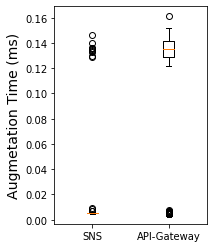

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
data = [ret,ret_api]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.boxplot(data)
ax1.set_xticklabels(['SNS', 'API-Gateway'])
ax1.set_ylabel('Augmetation Time (ms)',fontsize=14)
count =160
plt.show()
plt.draw()
fig.savefig('/Users/manchan/Desktop/aug-document/sns&api-boxplot.png',dpi=300)

<ipython-input-3-c2b125728b99>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['SNS', 'API-Gateway'])


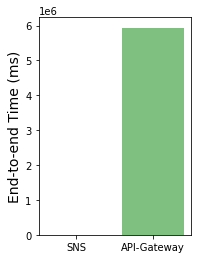

In [3]:
fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 2)

ax2.set_xticklabels(['SNS', 'API-Gateway'])
ax2.bar(['SNS', 'API-Gateway'],total,color=['limegreen','green'],alpha=0.5)
ax2.set_ylabel('End-to-end Time (ms)',fontsize=14)

plt.show()
fig.savefig('/Users/manchan/Desktop/aug-document/sns&api-barplot.png',dpi=300)

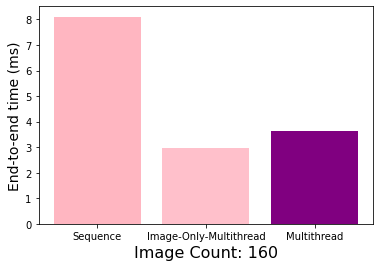

In [4]:
fig = plt.figure()
ec2 = [8.10899829864501953125, 2.97795581817626953125, 3.64845180511474609375]
ax = fig.add_subplot(1, 1, 1)
ax.bar(['Sequence', 'Image-Only-Multithread','Multithread'],ec2,color=['lightpink','pink','purple'])
ax.set_ylabel('End-to-end time (ms)',fontsize=14)
count =160

ax.set_xlabel("Image Count: {count}".format(count=count),fontsize=16)
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 12
plt.show()
fig.savefig('/Users/manchan/Desktop/BigDataLab/ec2-compare.png')

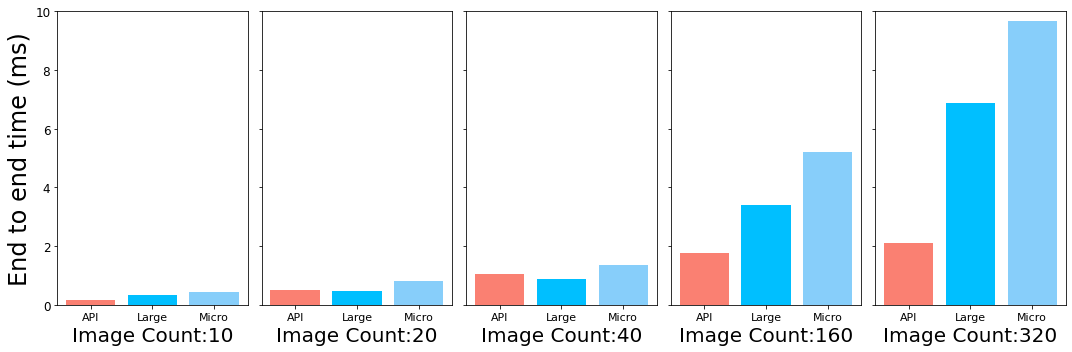

In [5]:
from matplotlib import pyplot as plt
x = [10, 20, 40, 160, 320]
lambda_api = [0.1665432453155517578125,0.4982562065124511718750, 1.0378391742706298828125, 1.7647411823272705078125, 2.1177513599395751953125]
g4dn_xlarge = [ 0.3187119960784912109375, 0.4821102619171142578125, 0.8725483417510986328125,3.3927381038665771484375,6.8945705890655517578125]
t2_micro =[0.44257450103759765625, 0.8209855556488037109375, 1.363794803619384765625, 5.1925857067108154296875, 9.6819972991943359375]

fig, ax = plt.subplots(1, 5, figsize=(15, 5),sharey=True)
plt.ylim((0,10))
plt.yticks(fontsize=25,sharey=True)
for i in range(5):    
    ax[i].bar(['API','Large','Micro'],[lambda_api[i],g4dn_xlarge[i],t2_micro[i]],color=['salmon','deepskyblue','lightskyblue'])
    image_count = 0
    if i == 0:
        ax[i].set_ylabel("End to end time (ms)",fontsize=24)
    if i<2:
        count = 10 * (i+1)
    elif i == 2:
        count = 40
    elif i == 3:
        count = 160
    elif i == 4:
        count = 320
    ax[i].set_xlabel("Image Count:{count}".format(count=count),fontsize=20)
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 17

plt.show()
fig.savefig('/Users/manchan/Desktop/aug-document/test-5.png',dpi=300)